In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

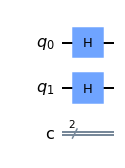

In [3]:
# importing set of data of |00> ,|01>, |10>, |11>

qc = QuantumCircuit(2,2)
qc.h([0,1])
qc.draw(output = 'mpl')

In [4]:
# Creating an oracle for search parameter
# Here our search parameter is will |w> state that we want to find. 

In [5]:
# So in the given parameter of |S> = 1/2 (|00>+|01>+|10>+|11>)
# We will change the phase of |10> to - |10>

In [7]:
# So our oracle will be

oracle = QuantumCircuit(2, name ='oracle')
oracle.cx(1,0)
oracle.cz(0,1)
oracle.cx(1,0)
oracle.to_gate()

Instruction(name='oracle', num_qubits=2, num_clbits=0, params=[])

In [8]:
# So the SEarch parameter will look like:

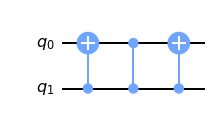

In [9]:
oracle.draw(output ='mpl')

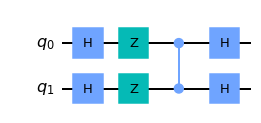

In [10]:
# Now we have isolated with oracle of what we want to search, now amplituding the search to show its presence

# To do so we will use diffuser opreator for the same.

#The diffuser opreator will read as follows

diffuser = QuantumCircuit(2, name = 'diffuser')

diffuser.h([0,1])
diffuser.z([0,1])
diffuser.cz(0,1)
diffuser.h([0,1])
diffuser.to_gate()
diffuser.draw(output ='mpl')

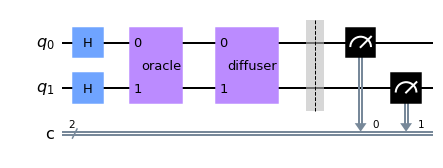

In [11]:
# Now we have all the pieces in place lets combine them to search our parameter in give domain

#Since we have already created an domain, now we have to apply our oracle+diffuser

qc.append(oracle,[0,1])
qc.append(diffuser,[0,1])

qc.barrier()

qc.measure([0,1], [0,1])

qc.draw(output= 'mpl')

In [12]:
# Lets check out if we measured our parameter found in domain or not

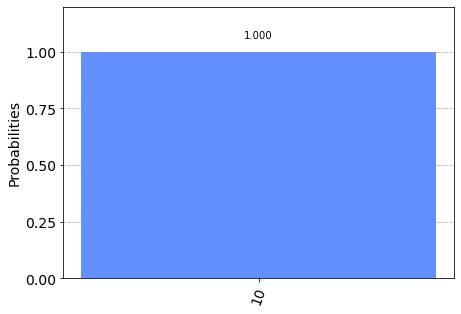

In [14]:
backend = Aer.get_backend('qasm_simulator')

result = execute(qc,backend,shots =1024).result()

counts = result.get_counts()
plot_histogram(counts)